<a href="https://colab.research.google.com/github/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/notebooks/mermaid_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizations using mermaid.js

Mermaid.js is a JavaScript-based diagramming and charting tool that renders markdown-inspired text definitions to create diagrams dynamically in the browser. It allows you to create various types of diagrams and visualizations using simple text syntax, such as flowcharts, sequence diagrams, class diagrams, state diagrams, entity relationship diagrams, user journey diagrams, Gantt charts, and pie charts.

## Live Mermaid Examples

https://mermaid.live/


## Jupyter Notebooks, Google Colab and Mermaid

Using Mermaid on Jupyter notebooks is tricky because Mermaid is based on Javascript and usually requires Node (a server based Javascript) to run.

As of September 2025 no "easy" plugin solution for Notebooks exists.

However, we can still render and display the Mermaid charts by installing required software and using Python to call it.

This is very error prone process as running Node through Colab can get messy

In [1]:
%%bash

set -e

echo "📦 Installing Node.js and Mermaid CLI..."

# Install NVM
curl -o- https://raw.githubusercontent.com/nvm-sh/nvm/v0.39.5/install.sh | bash

# Load NVM into shell
export NVM_DIR="$HOME/.nvm"
source "$NVM_DIR/nvm.sh"

# Install and activate Node.js 20
nvm install 20
nvm use 20

# Install Mermaid CLI
npm install -g @mermaid-js/mermaid-cli

# Save mmdc path
which mmdc > /content/mmdc_path.txt
echo "✅ mmdc installed at $(cat /content/mmdc_path.txt)"


📦 Installing Node.js and Mermaid CLI...
=> Downloading nvm from git to '/root/.nvm'
=> * (HEAD detached at FETCH_HEAD)
  master
=> Compressing and cleaning up git repository

=> Appending nvm source string to /root/.bashrc
=> Appending bash_completion source string to /root/.bashrc
=> You currently have modules installed globally with `npm`. These will no
=> longer be linked to the active version of Node when you install a new node
=> with `nvm`; and they may (depending on how you construct your `$PATH`)
=> override the binaries of modules installed with `nvm`:

/tools/node/lib
├── @google/gemini-cli@0.4.1
├── corepack@0.31.0
=> If you wish to uninstall them at a later point (or re-install them under your
=> `nvm` Nodes), you can remove them from the system Node as follows:

     $ nvm use system
     $ npm uninstall -g a_module

=> Close and reopen your terminal to start using nvm or run the following to use it now:

export NVM_DIR="$HOME/.nvm"
[ -s "$NVM_DIR/nvm.sh" ] && \. "$NVM_DIR

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15916  100 15916    0     0   107k      0 --:--:-- --:--:-- --:--:--  107k
Cloning into '/root/.nvm'...
######################################################################## 100.0%
Computing checksum with sha256sum
Checksums matched!
npm warn deprecated puppeteer@23.11.1: < 24.10.2 is no longer supported


In [2]:
from pathlib import Path

mmdc_path = Path("/content/mmdc_path.txt").read_text().strip()
print("✅ Mermaid CLI path:", mmdc_path)

✅ Mermaid CLI path: /root/.nvm/versions/node/v20.19.5/bin/mmdc


In [3]:
mermaid_code = """
flowchart LR
    A[Client/User] -->|JSON request| B[LLM Provider]
    B -->|Response| A
"""

with open("diagram.mmd", "w") as f:
    f.write(mermaid_code)

print("📄 Mermaid code written to diagram.mmd")

📄 Mermaid code written to diagram.mmd


## Tracking down Puppeteer / Chromium errors

When testing manually with ! --debug was not found so I tried the following command `! /root/.nvm/versions/node/v20.19.5/bin/mmdc -i diagram.mmd -o diagram.svg` and got the following error: `Generating single mermaid chart Error: Failed to launch the browser process!`

### GPT5 explanation of error

Running as root without --no-sandbox is not supported.
This happens because:

Google Colab runs everything as root

Chromium (used by Puppeteer) refuses to run without the --no-sandbox flag when run as root (for security reasons)

✅ Solution: Use --puppeteerConfigFile with --no-sandbox

We’ll now pass a JSON config file to Mermaid CLI that tells Puppeteer (Chromium) to run without sandboxing.

In [7]:
with open("puppeteer-config.json", "w") as f:
    f.write("""
{
  "args": ["--no-sandbox", "--disable-setuid-sandbox"]
}
""")
print("✅ Puppeteer config saved")

✅ Puppeteer config saved


In [14]:
import subprocess

mmdc_path = "/root/.nvm/versions/node/v20.19.5/bin/mmdc"

subprocess.run([
    mmdc_path,
    "-i", "diagram.mmd",
    "-o", "diagram.svg",
    "--puppeteerConfigFile", "puppeteer-config.json"
], check=True)

print("✅ Diagram generated")

✅ Diagram generated


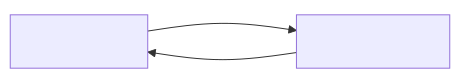

In [9]:
from IPython.display import SVG, display
display(SVG("diagram.svg"))

## Function to save text as mermaid file

In [11]:
from pathlib import Path

def save_mermaid_code(code: str, filename: str, encoding: str = "utf-8") -> Path:
    """
    Saves a Mermaid.js code string to a .mmd file.

    Args:
        code (str): The Mermaid diagram code.
        filename (str): The path to the file to write.
        encoding (str): Text encoding (default: 'utf-8').

    Returns:
        Path: The path to the saved file.
    """
    path = Path(filename)
    path.parent.mkdir(parents=True, exist_ok=True)
    path.write_text(code.strip(), encoding=encoding)
    print(f"✅ Mermaid code saved to {path.resolve()}")
    return path

In [36]:
mermaid_code = """
flowchart TD
    A[Start in Google Colab] --> B[Install NVM via bash]
    B --> C[Install Node.js 20 with NVM]
    C --> D[Install Mermaid CLI via npm]
    D --> E[Save mmdc path to file ]
    E --> F[Write Mermaid diagram to diagram.mmd]
    F --> G[Create puppeteer-config.json with --no-sandbox]
    G --> H[Run mmdc using Python subprocess]
    H --> I["Render SVG in notebook with display(SVG())"]
    I --> Z["✅<br/>Done<br/>!!"]
"""
### Note how in H --> I line we have to escape the text which contains parenthesis due to how mermaid treats those as code
# The problem is: display(SVG()) includes parentheses and dots, which Mermaid's parser interprets as syntax elements — not literal text.
save_mermaid_code(mermaid_code, "how_to_mermaid_in_colab.mmd")

✅ Mermaid code saved to /content/how_to_mermaid_in_colab.mmd


PosixPath('how_to_mermaid_in_colab.mmd')

## Function to render and display mermaid from colab

In [31]:
import subprocess
from pathlib import Path
from IPython.display import SVG, display

def render_mermaid_diagram(
    mmd_path: str,
    mmdc_path: str = "/root/.nvm/versions/node/v20.19.5/bin/mmdc",
    output_file: str = None,
    puppeteer_config: str = "puppeteer-config.json",
    show_svg: bool = True
):
    mmd_path = Path(mmd_path)

    if not output_file:
        output_file = mmd_path.with_suffix(".svg")
    else:
        output_file = Path(output_file)

    # Check if puppeteer config exists
    if not Path(puppeteer_config).exists():
        raise FileNotFoundError(f"Puppeteer config file not found: {puppeteer_config}")

    print(f"📄 Rendering {mmd_path.name} → {output_file.name} using mmdc...")

    subprocess.run([
        mmdc_path,
        "-i", str(mmd_path),
        "-o", str(output_file),
        "--puppeteerConfigFile", puppeteer_config
    ], check=True)

    print(f"✅ Diagram saved as {output_file}")

    if show_svg:
        display(SVG(filename=str(output_file)))


📄 Rendering how_to_mermaid_in_colab.mmd → how_to_mermaid_in_colab.svg using mmdc...
✅ Diagram saved as how_to_mermaid_in_colab.svg


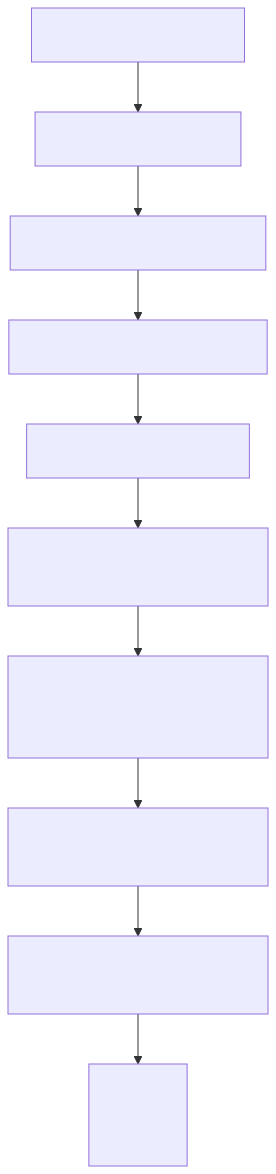

In [37]:
# now let's display how_to_mermaid_in_colab
render_mermaid_diagram(
    "how_to_mermaid_in_colab.mmd"
)